### Cab-Driver Agent

In [31]:
# Importing libraries
import numpy as np
import random
import math
from collections import deque
import collections
import pickle
import time

# for building DQN model
from keras import layers
from keras import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

# for plotting graphs
import matplotlib.pyplot as plt

# Import the environment
from Env import CabDriver

#### Defining Time Matrix

In [2]:
# Loading the time matrix provided
Time_matrix = np.load("TM.npy")

In [3]:
#Defining a function to save the Q-dictionary as a pickle file
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

### Agent Class

If you are using this framework, you need to fill the following to complete the following code block:
1. State and Action Size
2. Hyperparameters
3. Create a neural-network model in function 'build_model()'
4. Define epsilon-greedy strategy in function 'get_action()'
5. Complete the function 'append_sample()'. This function appends the recent experience tuple <state, action, reward, new-state> to the memory
6. Complete the 'train_model()' function with following logic:
   - If the memory size is greater than mini-batch size, you randomly sample experiences from memory as per the mini-batch size and do the following:
      - Initialise your input and output batch for training the model
      - Calculate the target Q value for each sample: reward + gamma*max(Q(s'a,))
      - Get Q(s', a) values from the last trained model
      - Update the input batch as your encoded state and output batch as your Q-values
      - Then fit your DQN model using the updated input and output batch.

In [4]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        # Define size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # Write here: Specify you hyper parameters for the DQN
        self.discount_factor =0.95
        self.learning_rate = 0.01       
        self.epsilon_max = 1
        self.epsilon_decay =-0.00015 
        self.epsilon_min = 0.00001
        self.epsilon=1
               
        self.batch_size = 32        
        # create replay memory using deque
        self.memory = deque(maxlen=2000)
        
        #to track state
        self.states_tracked0 =[]
        self.states_tracked1 =[]
        self.states_tracked2 =[]
        self.states_tracked3 =[]
        self.states_tracked4 =[]
        self.states_tracked5 =[]
        self.states_tracked6 =[]
        self.states_tracked7 =[]
        self.states_tracked8 =[]
        self.states_tracked9 =[]
        self.states_tracked10=[]
        self.states_tracked11=[]
        self.states_tracked12=[]
        self.states_tracked13=[]
        self.states_tracked14=[]
        self.states_tracked15=[]
        self.states_tracked16=[]
        self.states_tracked17=[]
        self.states_tracked18=[]
        self.states_tracked19=[]
        self.states_tracked20=[]
        self.states_tracked21=[]
        
        self.track_state = np.array(env.state_encod_arch1([0,0,0])).reshape(1, 36)

        # create main model and target model
        self.model = self.build_model()

    # approximate Q function using Neural Network
    def build_model(self):
        model = Sequential()
        # Write your code here: Add layers to your neural nets       
        model.add(Dense(32, input_dim=self.state_size, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
        
        model.add(Dense(self.action_size, activation='relu', kernel_initializer='he_uniform'))
        
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        model.summary
        return model



    def get_action(self, state):
    # Write your code here:
    # get action from model using epsilon-greedy policy
    # Decay in ε after we generate each sample from the environment
        possible_actions_index, actions = env.requests(state)
        if np.random.rand() <= self.epsilon:
            return random.choice(possible_actions_index)
        else:
            state = np.array(env.state_encod_arch1(state)).reshape(1, 36)
            
            q_value = self.model.predict(state)

            q_vals_possible = [q_value[0][i] for i in possible_actions_index]

            return possible_actions_index[np.argmax(q_vals_possible)]


    def append_sample(self, state, action, reward, next_state,done):
    # Write your code here:
    # save sample <s,a,r,s'> to the replay memory
        self.memory.append((state, action, reward, next_state, done))
    
    
    
    # pick samples randomly from replay memory (with batch_size) and train the network
    def train_model(self):        
        if len(self.memory) > self.batch_size:
            # Sample batch from the memory
            mini_batch = random.sample(self.memory, self.batch_size)
            update_output = np.zeros((self.batch_size, self.state_size))
            update_input =np.zeros((self.batch_size, self.state_size))
            
            actions, rewards,done = [], [],[]
            
            for i in range(self.batch_size):
                state, action, reward, next_state,isdone = mini_batch[i]
                # Write your code from here
                update_input[i] = env.state_encod_arch1(state)     
                actions.append(action)
                rewards.append(reward)
                update_output[i] = env.state_encod_arch1(next_state)
                done.append(isdone)
            
            # 1. Predict the target from earlier model
            target = self.model.predict(update_input)
                
            # 2. Get the target for the Q-network
            target_qval = self.model.predict(update_output)
                
            #3. Update your 'update_output' and 'update_input' batch
            for i in range(self.batch_size):
                if done[i]:
                    target[i][actions[i]] = rewards[i]
                else:
                    target[i][actions[i]] = rewards[i] + self.discount_factor * np.max(target_qval[i])
            
            # 4. Fit your model and track the loss values
            self.model.fit(update_input, target, batch_size=self.batch_size, epochs=1, verbose=0)

    def save(self, name):
        self.model.save(name)
        
    def save_tracking_states(self):
        q_value = self.model.predict(self.track_state)
        self.states_tracked0.append(q_value[0][0])
        self.states_tracked1.append(q_value[0][1])
        self.states_tracked2.append(q_value[0][2])
        self.states_tracked3.append(q_value[0][3])
        self.states_tracked4.append(q_value[0][4])
        self.states_tracked5.append(q_value[0][5])
        self.states_tracked6.append(q_value[0][6])
        self.states_tracked7.append(q_value[0][7])
        self.states_tracked8.append(q_value[0][8])
        self.states_tracked9.append(q_value[0][9])
        self.states_tracked10.append(q_value[0][10])
        self.states_tracked11.append(q_value[0][11])
        self.states_tracked12.append(q_value[0][12])
        self.states_tracked13.append(q_value[0][13])
        self.states_tracked14.append(q_value[0][14])
        self.states_tracked15.append(q_value[0][15])
        self.states_tracked16.append(q_value[0][16])
        self.states_tracked17.append(q_value[0][17])
        self.states_tracked18.append(q_value[0][18])
        self.states_tracked19.append(q_value[0][19])
        self.states_tracked20.append(q_value[0][20])

In [5]:
episode_time = 24*30 #30 days before which car has to be recharged
Episodes = 50000
m = 5
t = 24
d = 7

# Invoke Env class
env = CabDriver()
action_space, state_space, state = env.reset()

# Set up state and action sizes.
state_size = m+t+d
action_size = len(action_space)

#Call the DQN agent
agent = DQNAgent(action_size=action_size, state_size=state_size)

# to store rewards in each episode
rewards_per_episode, episodes = [], []

### DQN block

In [6]:
start_time = time.time()

for episode in range(Episodes):

    # Write code here
    done = False
    score = 0
    # Call the environment
    env = CabDriver()
    # Call all the initialised variables of the environment
    action_space, state_space, state = env.reset()  
    
    total_time = 0 
    
    while not done:
        
        # Write your code here
        # 1. Pick epsilon-greedy action from possible actions for the current state
        
        action = agent.get_action(state)
        # 2. Evaluate your reward and next state
        next_state,reward, step_time = env.step(state, env.action_space[action], Time_matrix)
        total_time += step_time
        
        if (total_time > episode_time):
            done=True
        else:
            # 3. Append the experience to the memory
            agent.append_sample(state, action, reward, next_state, done)
            # 4. Train the model by calling function agent.train_model
            agent.train_model()
            # 5. Keep a track of rewards, Q-values, loss
            score += reward
            state = next_state
        
    rewards_per_episode.append(score)
    episodes.append(episode)

    # epsilon decay
    agent.epsilon = (1 - 0.00001) * np.exp(agent.epsilon_decay * episode)

    # every 50 episodes:
    if ((episode + 1) % 50 == 0):
        print("episode {0}, reward {1}, memory_length {2}, epsilon {3} total_time {4}".format(episode+1,
                                                                         score,
                                                                         len(agent.memory),
                                                                         agent.epsilon, total_time))
    # Save the Q_value of the state, action pair we are tracking
    if ((episode + 1) % 50 == 0):
        agent.save_tracking_states()


    if(episode+1 % 500 == 0):
        print("Saving Model {}".format(episode))
        agent.save(name="model_weights2.pkl")

agent.save(name="model_weights2.pkl")
elapsed_time = time.time() - start_time
print(elapsed_time)

        



episode 50, reward -357.0, memory_length 2000, epsilon 0.9951020342959757 total_time 726.0
episode 100, reward -259.0, memory_length 2000, epsilon 0.9901389421945204 total_time 735.0
episode 150, reward -338.0, memory_length 2000, epsilon 0.9852006036181897 total_time 722.0
episode 200, reward 83.0, memory_length 2000, epsilon 0.980286895108262 total_time 727.0
episode 250, reward -101.0, memory_length 2000, epsilon 0.9753976938217688 total_time 725.0
episode 300, reward 74.0, memory_length 2000, epsilon 0.970532877528423 total_time 723.0
episode 350, reward -197.0, memory_length 2000, epsilon 0.965692324607564 total_time 725.0
episode 400, reward 46.0, memory_length 2000, epsilon 0.9608759140451169 total_time 723.0
episode 450, reward -376.0, memory_length 2000, epsilon 0.9560835254305664 total_time 723.0
episode 500, reward -72.0, memory_length 2000, epsilon 0.9513150389539479 total_time 721.0
episode 550, reward -303.0, memory_length 2000, epsilon 0.9465703354028507 total_time 722

episode 4300, reward 86.0, memory_length 2000, epsilon 0.6505676431439539 total_time 726.0
episode 4350, reward 18.0, memory_length 2000, epsilon 0.6473229234872059 total_time 722.0
episode 4400, reward -12.0, memory_length 2000, epsilon 0.6440943869372597 total_time 726.0
episode 4450, reward -333.0, memory_length 2000, epsilon 0.6408819527805336 total_time 721.0
episode 4500, reward -288.0, memory_length 2000, epsilon 0.6376855407060062 total_time 721.0
episode 4550, reward -43.0, memory_length 2000, epsilon 0.6345050708032095 total_time 722.0
episode 4600, reward 219.0, memory_length 2000, epsilon 0.6313404635602299 total_time 723.0
episode 4650, reward 11.0, memory_length 2000, epsilon 0.6281916398617216 total_time 721.0
episode 4700, reward 519.0, memory_length 2000, epsilon 0.6250585209869283 total_time 730.0
episode 4750, reward 127.0, memory_length 2000, epsilon 0.6219410286077147 total_time 728.0
episode 4800, reward 235.0, memory_length 2000, epsilon 0.6188390847866092 total_

episode 8800, reward 197.0, memory_length 2000, epsilon 0.4148202438028128 total_time 724.0
episode 8850, reward 243.0, memory_length 2000, epsilon 0.41275131920554964 total_time 725.0
episode 8900, reward 379.0, memory_length 2000, epsilon 0.41069271341276414 total_time 723.0
episode 8950, reward 813.0, memory_length 2000, epsilon 0.4086443749592042 total_time 730.0
episode 9000, reward 210.0, memory_length 2000, epsilon 0.40660625263630185 total_time 723.0
episode 9050, reward 335.0, memory_length 2000, epsilon 0.4045782954908928 total_time 728.0
episode 9100, reward 227.0, memory_length 2000, epsilon 0.4025604528239428 total_time 724.0
episode 9150, reward 476.0, memory_length 2000, epsilon 0.40055267418928026 total_time 722.0
episode 9200, reward 392.0, memory_length 2000, epsilon 0.3985549093923344 total_time 727.0
episode 9250, reward 694.0, memory_length 2000, epsilon 0.39656710848888155 total_time 726.0
episode 9300, reward 567.0, memory_length 2000, epsilon 0.39458922178379546

episode 13200, reward 1233.0, memory_length 2000, epsilon 0.2671593452115997 total_time 723.0
episode 13250, reward 1029.0, memory_length 2000, epsilon 0.26582688241848745 total_time 722.0
episode 13300, reward 569.0, memory_length 2000, epsilon 0.26450106531128087 total_time 723.0
episode 13350, reward 1053.0, memory_length 2000, epsilon 0.2631818607444832 total_time 724.0
episode 13400, reward 736.0, memory_length 2000, epsilon 0.26186923573791143 total_time 726.0
episode 13450, reward 827.0, memory_length 2000, epsilon 0.2605631574758722 total_time 725.0
episode 13500, reward 875.0, memory_length 2000, epsilon 0.2592635933063409 total_time 722.0
episode 13550, reward -126.0, memory_length 2000, epsilon 0.25797051074014565 total_time 728.0
episode 13600, reward 474.0, memory_length 2000, epsilon 0.25668387745015475 total_time 723.0
episode 13650, reward 848.0, memory_length 2000, epsilon 0.2554036612704691 total_time 728.0
episode 13700, reward 723.0, memory_length 2000, epsilon 0.25

episode 17600, reward 1192.0, memory_length 2000, epsilon 0.17206034854899416 total_time 727.0
episode 17650, reward 487.0, memory_length 2000, epsilon 0.17120219398049166 total_time 722.0
episode 17700, reward 553.0, memory_length 2000, epsilon 0.17034831947575557 total_time 724.0
episode 17750, reward 878.0, memory_length 2000, epsilon 0.1694987036878786 total_time 722.0
episode 17800, reward 1215.0, memory_length 2000, epsilon 0.16865332537642194 total_time 722.0
episode 17850, reward 1133.0, memory_length 2000, epsilon 0.1678121634068837 total_time 724.0
episode 17900, reward 28.0, memory_length 2000, epsilon 0.16697519675017092 total_time 724.0
episode 17950, reward 353.0, memory_length 2000, epsilon 0.16614240448207343 total_time 728.0
episode 18000, reward 936.0, memory_length 2000, epsilon 0.16531376578274132 total_time 729.0
episode 18050, reward 1197.0, memory_length 2000, epsilon 0.16448925993616384 total_time 725.0
episode 18100, reward 838.0, memory_length 2000, epsilon 0.

episode 22000, reward 374.0, memory_length 2000, epsilon 0.11081313108981206 total_time 726.0
episode 22050, reward 269.0, memory_length 2000, epsilon 0.11026044829277756 total_time 721.0
episode 22100, reward 1252.0, memory_length 2000, epsilon 0.10971052201269317 total_time 726.0
episode 22150, reward 1001.0, memory_length 2000, epsilon 0.10916333850137319 total_time 722.0
episode 22200, reward 1015.0, memory_length 2000, epsilon 0.10861888407920135 total_time 723.0
episode 22250, reward 1571.0, memory_length 2000, epsilon 0.10807714513478867 total_time 728.0
episode 22300, reward 1119.0, memory_length 2000, epsilon 0.10753810812463342 total_time 726.0
episode 22350, reward 939.0, memory_length 2000, epsilon 0.10700175957278224 total_time 730.0
episode 22400, reward 307.0, memory_length 2000, epsilon 0.1064680860704934 total_time 727.0
episode 22450, reward 1134.0, memory_length 2000, epsilon 0.10593707427590153 total_time 726.0
episode 22500, reward 934.0, memory_length 2000, epsilo

episode 26350, reward 699.0, memory_length 2000, epsilon 0.07172542440272181 total_time 723.0
episode 26400, reward 267.0, memory_length 2000, epsilon 0.07136769235609955 total_time 726.0
episode 26450, reward 254.0, memory_length 2000, epsilon 0.07101174450550324 total_time 730.0
episode 26500, reward 846.0, memory_length 2000, epsilon 0.07065757195221811 total_time 723.0
episode 26550, reward 457.0, memory_length 2000, epsilon 0.07030516584191189 total_time 730.0
episode 26600, reward 1.0, memory_length 2000, epsilon 0.06995451736441344 total_time 730.0
episode 26650, reward 1202.0, memory_length 2000, epsilon 0.06960561775349253 total_time 734.0
episode 26700, reward 258.0, memory_length 2000, epsilon 0.06925845828664079 total_time 723.0
episode 26750, reward 1113.0, memory_length 2000, epsilon 0.06891303028485345 total_time 723.0
episode 26800, reward 1174.0, memory_length 2000, epsilon 0.06856932511241243 total_time 723.0
episode 26850, reward 747.0, memory_length 2000, epsilon 0.

episode 30700, reward 541.0, memory_length 2000, epsilon 0.04642533294705847 total_time 725.0
episode 30750, reward 401.0, memory_length 2000, epsilon 0.04619378563299837 total_time 721.0
episode 30800, reward 1258.0, memory_length 2000, epsilon 0.045963393165985 total_time 725.0
episode 30850, reward 1132.0, memory_length 2000, epsilon 0.04573414978619473 total_time 721.0
episode 30900, reward 1265.0, memory_length 2000, epsilon 0.0455060497625311 total_time 730.0
episode 30950, reward 1347.0, memory_length 2000, epsilon 0.045279087392481654 total_time 723.0
episode 31000, reward 1192.0, memory_length 2000, epsilon 0.04505325700197528 total_time 722.0
episode 31050, reward 1086.0, memory_length 2000, epsilon 0.044828552945240505 total_time 722.0
episode 31100, reward 806.0, memory_length 2000, epsilon 0.04460496960466418 total_time 722.0
episode 31150, reward 1312.0, memory_length 2000, epsilon 0.04438250139065115 total_time 723.0
episode 31200, reward 368.0, memory_length 2000, epsil

episode 35050, reward 126.0, memory_length 2000, epsilon 0.03004947767396471 total_time 721.0
episode 35100, reward 14.0, memory_length 2000, epsilon 0.029899605278816785 total_time 730.0
episode 35150, reward -178.0, memory_length 2000, epsilon 0.02975048037535809 total_time 726.0
episode 35200, reward -194.0, memory_length 2000, epsilon 0.0296020992354583 total_time 726.0
episode 35250, reward 56.0, memory_length 2000, epsilon 0.02945445814958117 total_time 731.0
episode 35300, reward 198.0, memory_length 2000, epsilon 0.02930755342669187 total_time 721.0
episode 35350, reward -147.0, memory_length 2000, epsilon 0.02916138139416466 total_time 732.0
episode 35400, reward 195.0, memory_length 2000, epsilon 0.02901593839769114 total_time 725.0
episode 35450, reward 187.0, memory_length 2000, epsilon 0.02887122080118881 total_time 721.0
episode 35500, reward 117.0, memory_length 2000, epsilon 0.02872722498671022 total_time 721.0
episode 35550, reward 423.0, memory_length 2000, epsilon 0.

episode 39400, reward 57.0, memory_length 2000, epsilon 0.0194499651625076 total_time 723.0
episode 39450, reward 646.0, memory_length 2000, epsilon 0.01935295805655799 total_time 728.0
episode 39500, reward 300.0, memory_length 2000, epsilon 0.019256434775567755 total_time 725.0
episode 39550, reward 610.0, memory_length 2000, epsilon 0.019160392906449858 total_time 725.0
episode 39600, reward 690.0, memory_length 2000, epsilon 0.01906483004815256 total_time 723.0
episode 39650, reward 537.0, memory_length 2000, epsilon 0.018969743811599424 total_time 726.0
episode 39700, reward -200.0, memory_length 2000, epsilon 0.018875131819629586 total_time 722.0
episode 39750, reward 464.0, memory_length 2000, epsilon 0.018780991706938317 total_time 727.0
episode 39800, reward 628.0, memory_length 2000, epsilon 0.0186873211200179 total_time 722.0
episode 39850, reward 557.0, memory_length 2000, epsilon 0.018594117717098787 total_time 723.0
episode 39900, reward 283.0, memory_length 2000, epsilon

episode 43750, reward 605.0, memory_length 2000, epsilon 0.012589275225589853 total_time 724.0
episode 43800, reward 570.0, memory_length 2000, epsilon 0.012526485953453176 total_time 725.0
episode 43850, reward 623.0, memory_length 2000, epsilon 0.012464009844117756 total_time 722.0
episode 43900, reward 157.0, memory_length 2000, epsilon 0.012401845335677609 total_time 721.0
episode 43950, reward 509.0, memory_length 2000, epsilon 0.012339990874016781 total_time 723.0
episode 44000, reward 82.0, memory_length 2000, epsilon 0.012278444912770503 total_time 723.0
episode 44050, reward 657.0, memory_length 2000, epsilon 0.012217205913286558 total_time 724.0
episode 44100, reward 632.0, memory_length 2000, epsilon 0.012156272344586756 total_time 725.0
episode 44150, reward 437.0, memory_length 2000, epsilon 0.012095642683328712 total_time 723.0
episode 44200, reward 269.0, memory_length 2000, epsilon 0.01203531541376773 total_time 721.0
episode 44250, reward 601.0, memory_length 2000, eps

episode 48100, reward 31.0, memory_length 2000, epsilon 0.008148593037645167 total_time 730.0
episode 48150, reward 446.0, memory_length 2000, epsilon 0.008107951760319542 total_time 734.0
episode 48200, reward 100.0, memory_length 2000, epsilon 0.008067513182210223 total_time 723.0
episode 48250, reward 441.0, memory_length 2000, epsilon 0.008027276292350638 total_time 727.0
episode 48300, reward 466.0, memory_length 2000, epsilon 0.007987240084816452 total_time 721.0
episode 48350, reward 246.0, memory_length 2000, epsilon 0.00794740355870039 total_time 721.0
episode 48400, reward 248.0, memory_length 2000, epsilon 0.007907765718087222 total_time 731.0
episode 48450, reward 486.0, memory_length 2000, epsilon 0.00786832557202887 total_time 721.0
episode 48500, reward 347.0, memory_length 2000, epsilon 0.007829082134519627 total_time 722.0
episode 48550, reward 537.0, memory_length 2000, epsilon 0.007790034424471505 total_time 729.0
episode 48600, reward 378.0, memory_length 2000, epsi

### Tracking Convergence

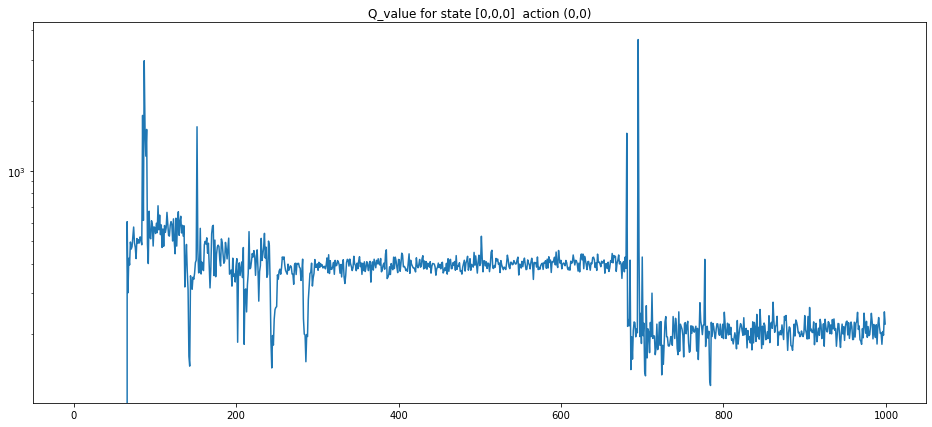

In [7]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (0,0)')
xaxis = np.asarray(range(0, len(agent.states_tracked0)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked0))
plt.show()

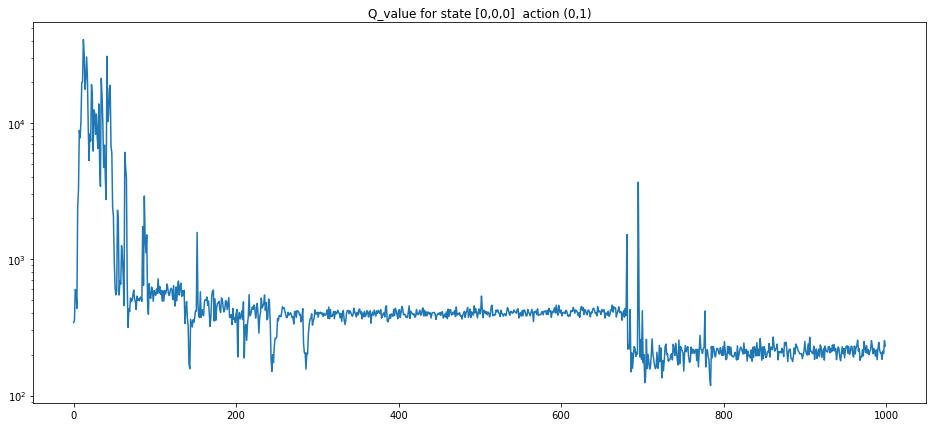

In [8]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (0,1)')
xaxis = np.asarray(range(0, len(agent.states_tracked1)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked1))
plt.show()

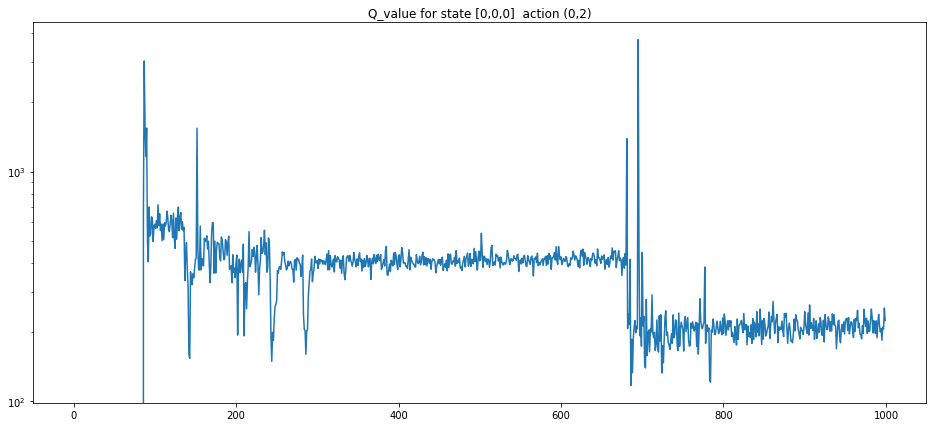

In [9]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (0,2)')
xaxis = np.asarray(range(0, len(agent.states_tracked2)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked2))
plt.show()

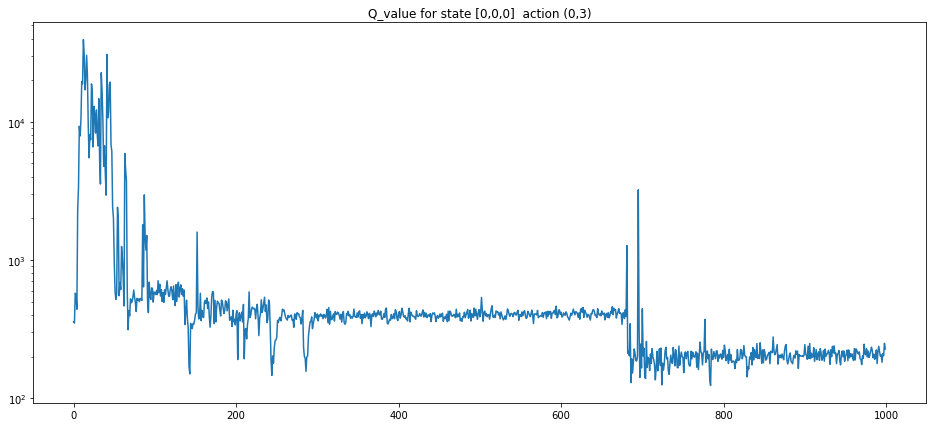

In [10]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (0,3)')
xaxis = np.asarray(range(0, len(agent.states_tracked3)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked3))
plt.show()

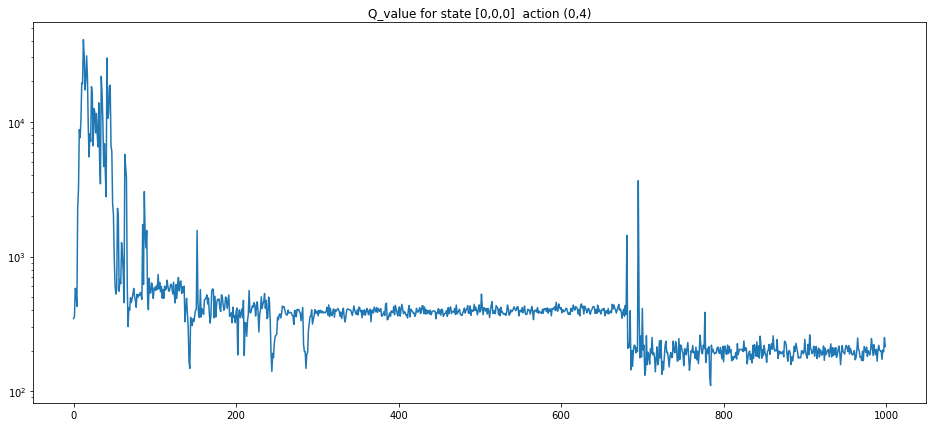

In [11]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (0,4)')
xaxis = np.asarray(range(0, len(agent.states_tracked4)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked4))
plt.show()

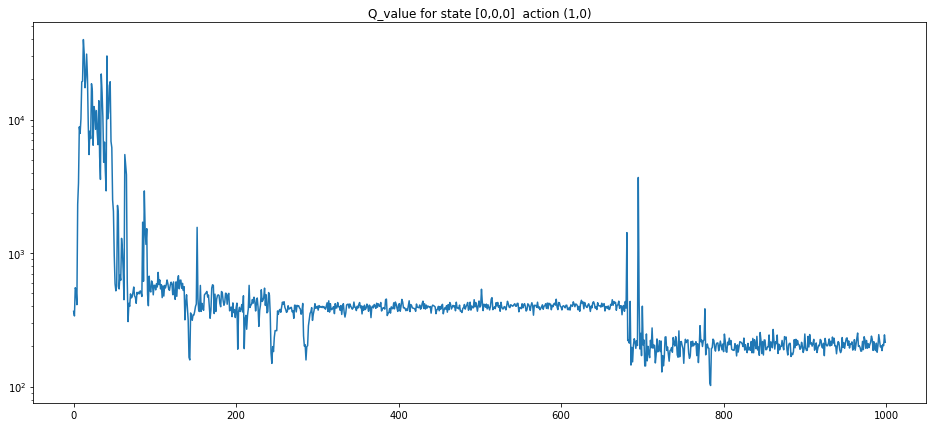

In [12]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (1,0)')
xaxis = np.asarray(range(0, len(agent.states_tracked5)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked5))
plt.show()

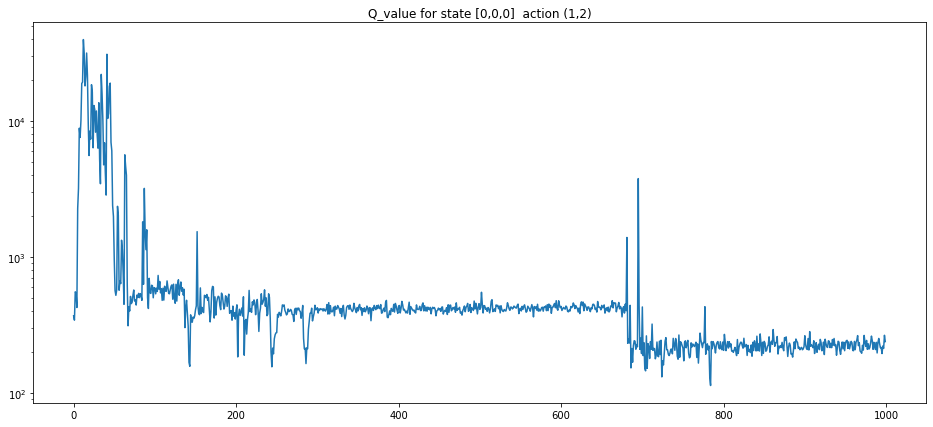

In [13]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (1,2)')
xaxis = np.asarray(range(0, len(agent.states_tracked6)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked6))
plt.show()

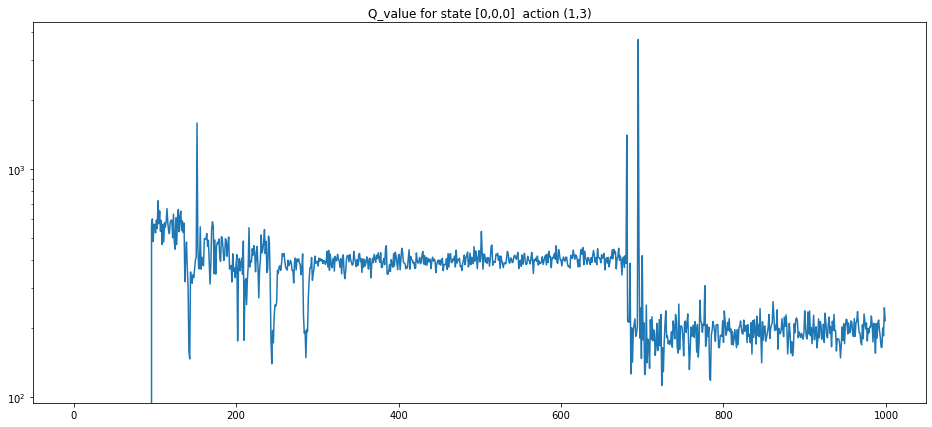

In [14]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (1,3)')
xaxis = np.asarray(range(0, len(agent.states_tracked7)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked7))
plt.show()

C:\Users\vijay.y\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  after removing the cwd from sys.path.


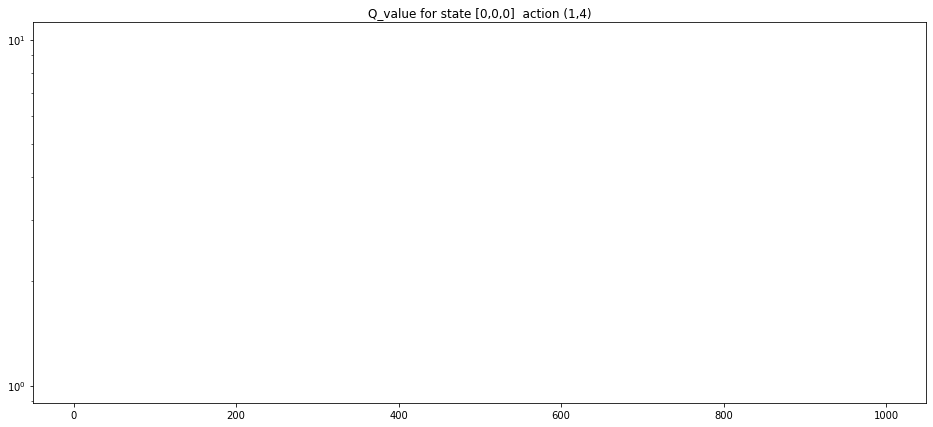

In [15]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (1,4)')
xaxis = np.asarray(range(0, len(agent.states_tracked8)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked8))
plt.show()

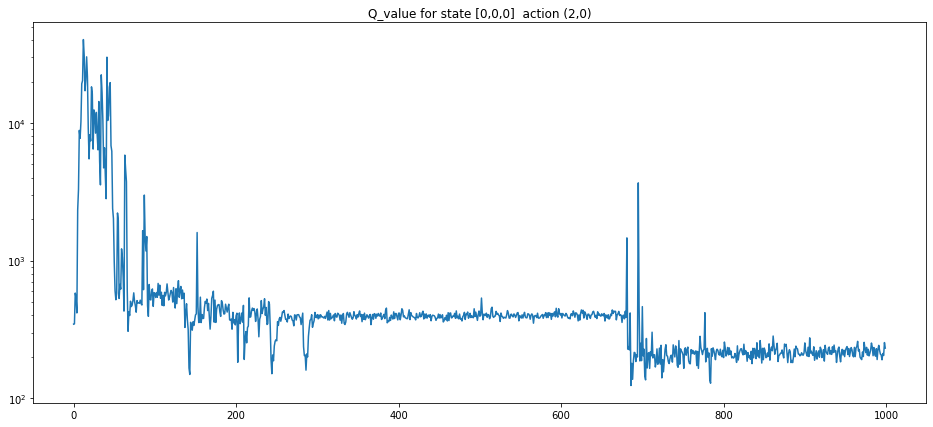

In [16]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (2,0)')
xaxis = np.asarray(range(0, len(agent.states_tracked9)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked9))
plt.show()

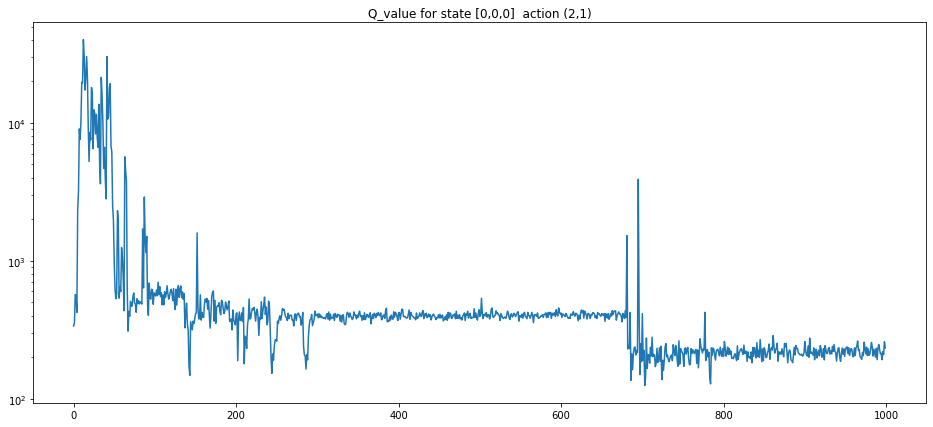

In [17]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (2,1)')
xaxis = np.asarray(range(0, len(agent.states_tracked10)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked10))
plt.show()

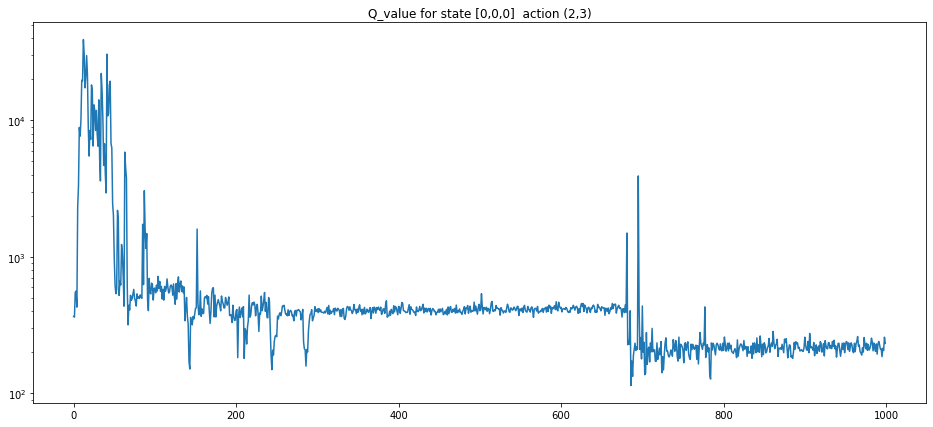

In [18]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (2,3)')
xaxis = np.asarray(range(0, len(agent.states_tracked11)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked11))
plt.show()

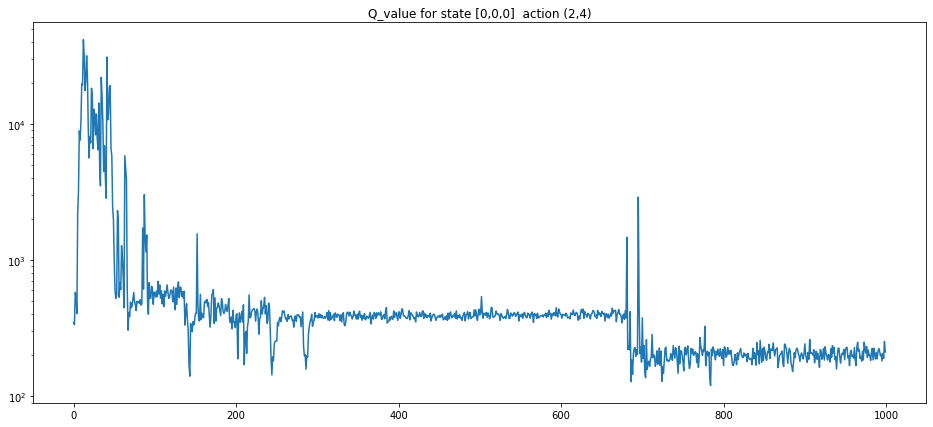

In [19]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (2,4)')
xaxis = np.asarray(range(0, len(agent.states_tracked12)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked12))
plt.show()

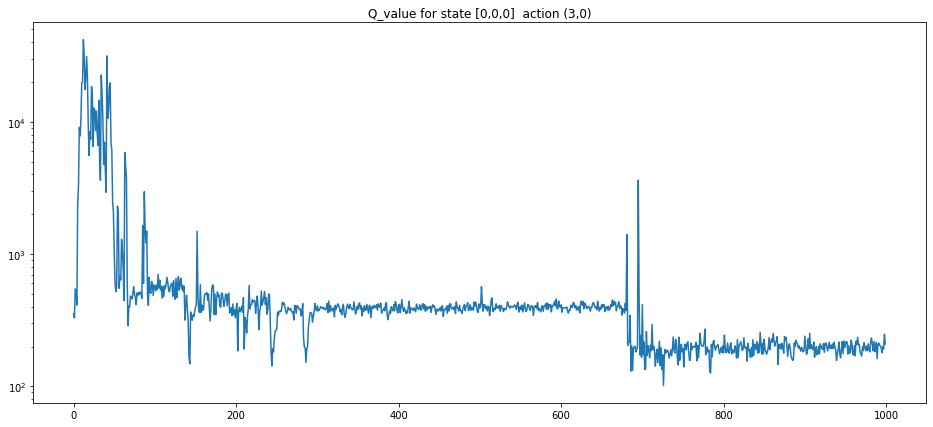

In [20]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (3,0)')
xaxis = np.asarray(range(0, len(agent.states_tracked13)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked13))
plt.show()

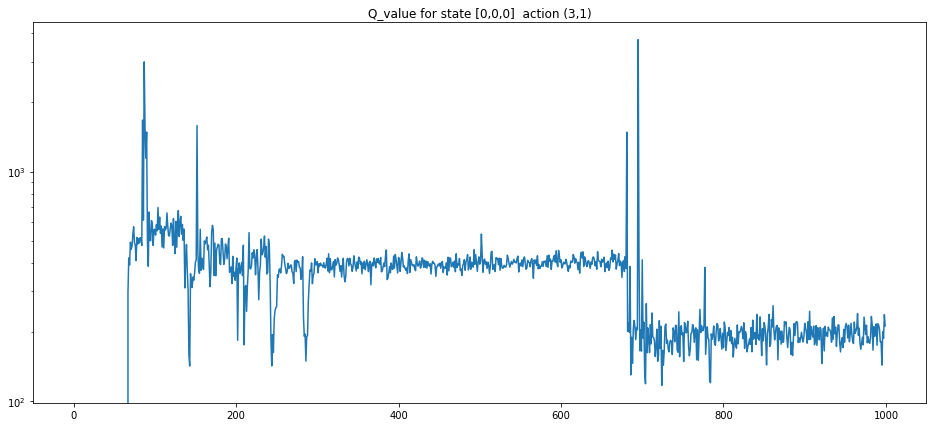

In [21]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (3,1)')
xaxis = np.asarray(range(0, len(agent.states_tracked14)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked14))
plt.show()

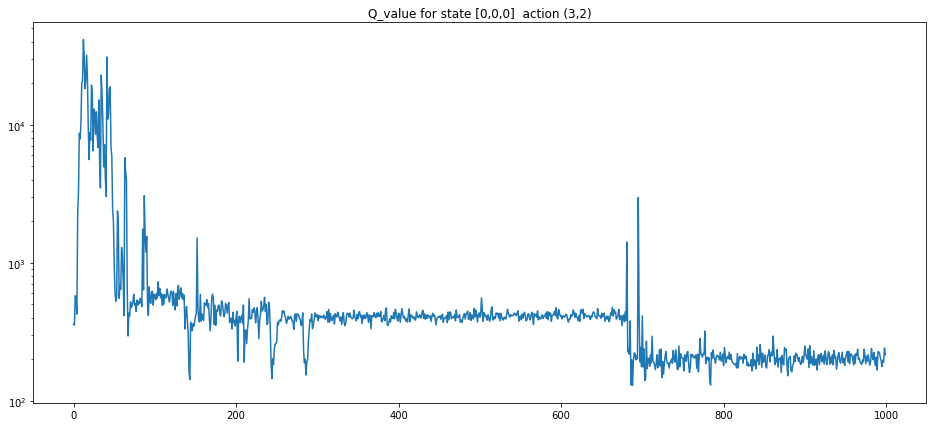

In [22]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (3,2)')
xaxis = np.asarray(range(0, len(agent.states_tracked15)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked15))
plt.show()

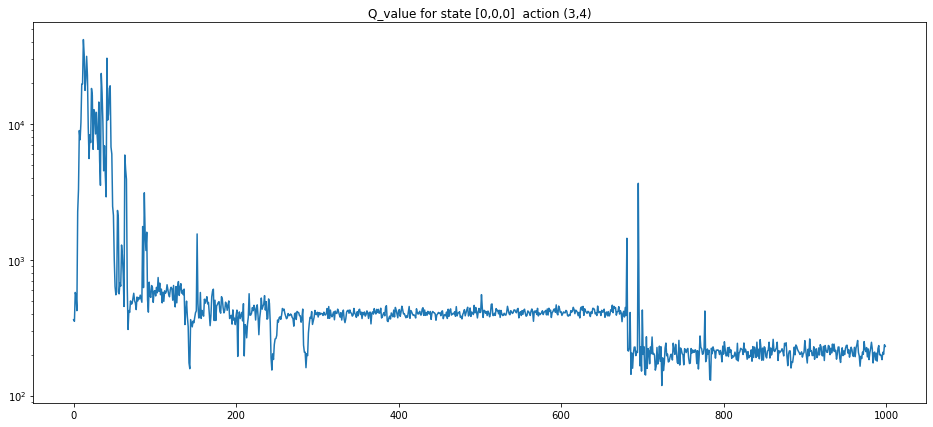

In [23]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (3,4)')
xaxis = np.asarray(range(0, len(agent.states_tracked16)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked16))
plt.show()

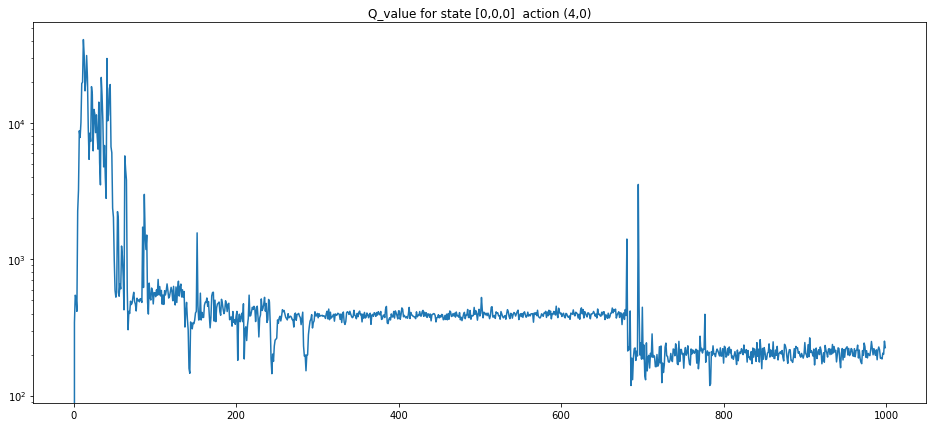

In [24]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (4,0)')
xaxis = np.asarray(range(0, len(agent.states_tracked17)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked17))
plt.show()

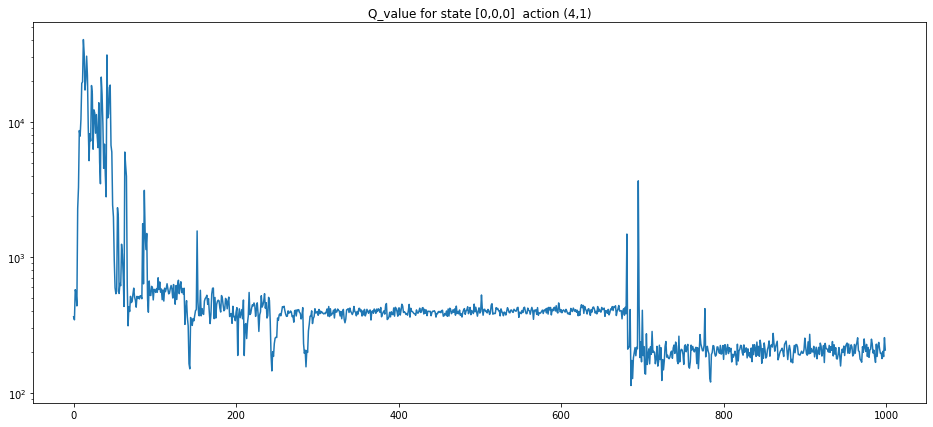

In [25]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (4,1)')
xaxis = np.asarray(range(0, len(agent.states_tracked18)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked18))
plt.show()

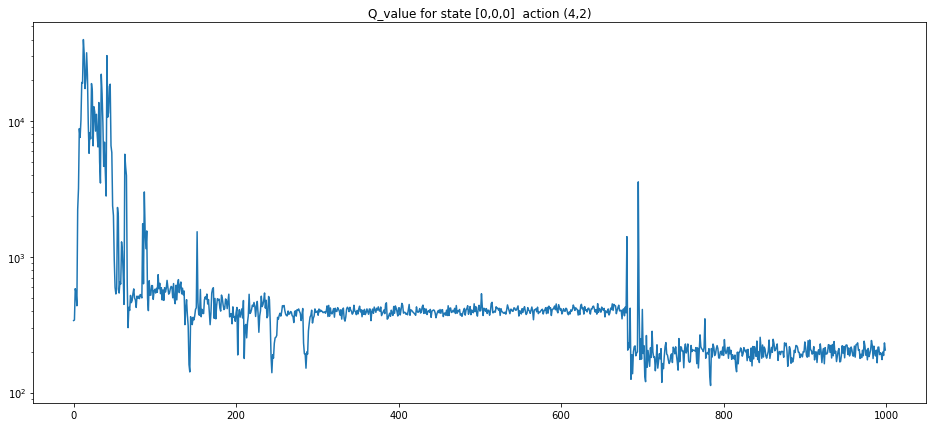

In [26]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (4,2)')
xaxis = np.asarray(range(0, len(agent.states_tracked19)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked19))
plt.show()

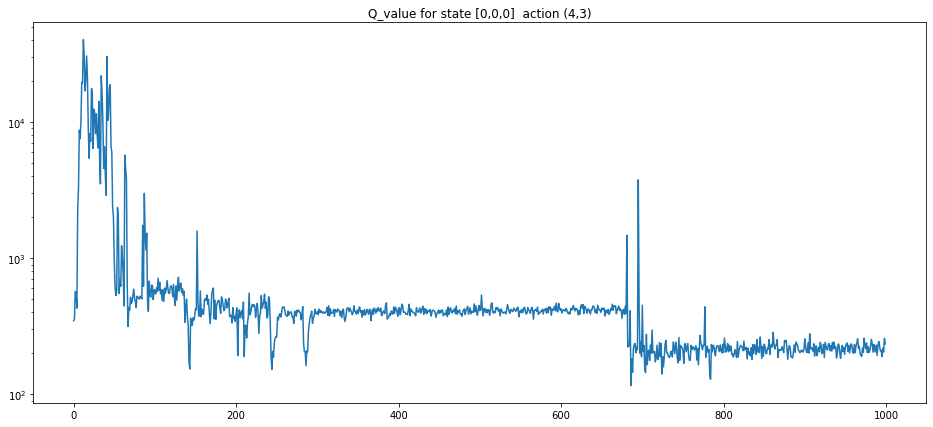

In [27]:
plt.figure(0, figsize=(16,7))
plt.title('Q_value for state [0,0,0]  action (4,3)')
xaxis = np.asarray(range(0, len(agent.states_tracked20)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked20))
plt.show()

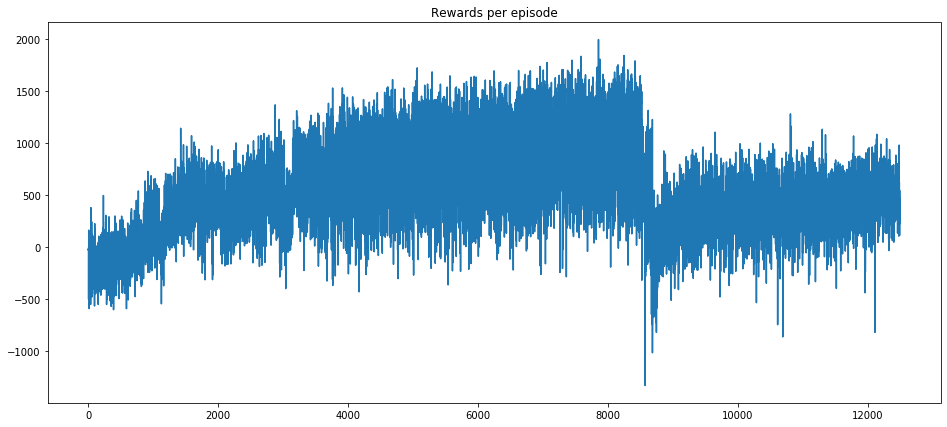

In [28]:
t_sample = [rewards_per_episode[i] for i in range(len(rewards_per_episode)) if (i % 4 == 0)]
plt.figure(0, figsize=(16,7))
plt.title('Rewards per episode')
xaxis = np.asarray(range(0, len(t_sample)))
plt.plot(xaxis,np.asarray(t_sample))
plt.show()

#### Epsilon-decay sample function

<div class="alert alert-block alert-info">
Try building a similar epsilon-decay function for your model.
</div>

In [29]:
time = np.arange(0,10000)
epsilon = []
for i in range(0,10000):
    epsilon.append(0 + (1 - 0) * np.exp(-0.0009*i))

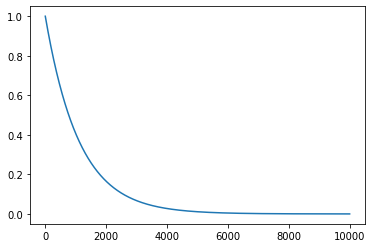

In [30]:
plt.plot(time, epsilon)
plt.show()